In [1]:
import pandas as pd
import numpy as np
import pycountry
import pycountry_convert as pc

### Top Nations Present in National Gallery of Art in Washington, DC

In [2]:
nationalities = pd.read_csv('./data_samples/constituents_nationalities.csv')

In [3]:
artist_origin = nationalities.value_counts(normalize=True)

<AxesSubplot:xlabel='Unknown'>

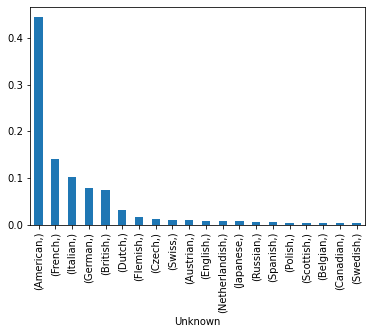

In [4]:
artist_origin[:20].plot(kind='bar')

### Cleaning a List of American Continent Codes for Determining which Latin American countries are present in the Gallery

In [5]:
cname_alpha_2 = []
cname_alpha_3 = []
for country in pycountry.countries:
    cname_alpha_2.append(country.alpha_2)
    cname_alpha_3.append(country.alpha_3)

In [6]:
cname_alpha_2 = pd.Series(cname_alpha_2)
cname_alpha_3 = pd.Series(cname_alpha_3)

In [7]:
error_list = ['AQ', 'TF', 'EH', 'PN', 'SX', 'TL', 'UM', 'VA']
continent_names = cname_alpha_2.apply(lambda x: pc.country_alpha2_to_continent_code(x) if x not in error_list else 'non-transformable')

In [8]:
country_and_continent = pd.DataFrame([cname_alpha_2, continent_names], index= ['Country', 'Continent']).T

In [9]:
total_by_continent = country_and_continent.groupby('Continent').count()

In [10]:
remove_from_index = ['non-transformable']
total_by_continent.index = pd.Series(list(total_by_continent.index)).apply(lambda x: pc.convert_continent_code_to_continent_name(x) if x not in remove_from_index else x)

### Distribution of Countries by Continent (World Wide)

In [11]:
total_by_continent

,Country
Africa,57
Antarctica,2
Asia,53
Europe,50
North America,40
Oceania,24
South America,15
non-transformable,8


In [12]:
Latin_in_NA = ['BZ', 'CR', 'CU', 'DO', 'SV', 'GT', 'HT', 'HN', 'JM', 'MX', 'NI', 'PA', 'LC']
latin_in_NA_map = country_and_continent.Country.apply(lambda x: x in Latin_in_NA)
latin_in_SA_map = country_and_continent.Continent.apply(lambda x: x == 'SA')
latins = country_and_continent.where(latin_in_SA_map | latin_in_NA_map).dropna()
latins.name = 'Latin Counties'
latins.reset_index(inplace=True, drop=True)
latins['Country Name'] = latins.Country.apply(pc.country_alpha2_to_country_name)

### Latin American Group

In [13]:
latins

,Country,Continent,Country Name
0,AR,SA,Argentina
1,BZ,NA,Belize
2,BO,SA,"Bolivia, Plurinational State of"
3,BR,SA,Brazil
4,CL,SA,Chile
5,CO,SA,Colombia
6,CR,NA,Costa Rica
7,CU,NA,Cuba
8,DO,NA,Dominican Republic
9,EC,SA,Ecuador


In [14]:
artist_origin.index = [x[0] for x in list(artist_origin.index)]

In [15]:
latins['Demonym'] = ['Argentinean', 'Belizean', 'Bolivian', 'Brazilian', 'Chilean', 'Colombian', 'Costa Rican', 'Cuban', 'Dominican', 'Ecuadorian', 'Falkland Islander', 'Guatemalan', 'Guianese', 'Guyanese', 'Honduran', 'Haitian', 'Jamaican', 'Saint Lucian', 'Mexican', 'Nicaraguan', 'Panamanian', 'Peruvian', 'Paraguayan', 'South Georgian', 'Salvadoran', 'Surinamese', 'Uruguayan', 'Venezuelan']

In [16]:
artist_origin = artist_origin.reset_index()

In [17]:
artist_origin.columns = ['Demonym', 'Percent_in_NGA']

In [18]:
latin_in_nga = pd.merge(artist_origin, latins, how='inner', on ='Demonym')

In [ ]:
latin_in_nga.to_csv('./latin_in_nga.csv')

In [19]:
percent_all_latin = latin_in_nga.Percent_in_NGA.sum()
japanese_percent = artist_origin.where(artist_origin.Demonym == 'Japanese').dropna()['Percent_in_NGA'][12]
print(f'The percent of all Latin American art present within the National Gallery of Art in Washington, DC is {percent_all_latin}% (rank 13), placing it right below the percent of Japanese art which is at {japanese_percent}% (rank 12)')

The percent of all Latin American art present within the National Gallery of Art in Washington, DC is 0.006402299601489514% (rank 13), placing it right below the percent of Japanese art which is at 0.00672894754034102% (rank 12)


## Extracting Latin American Art data present within the NGA database

SQL Ran: latin_object_constituents.sql

In [20]:
latin_art_nga = pd.read_csv('./data_samples/latin_art_nga.csv')

In [ ]:
latin_art_nga['Continent'] = latin_art_nga.Continent.replace({np.nan: 'North America', 'SA': 'South America'})

In [ ]:
latin_art_nga.drop(['prefix', 'suffix','beginyear', 'endyear', 'country', 'zipcode', 'displaydate', 'constituentid'], axis = 1, inplace=True)

In [ ]:
latin_art_nga.columns = [x.strip('.1') for x in latin_art_nga.columns]

In [ ]:
latin_art_nga.to_csv('./data_samples/latin_art_nga.csv')

### Data with Links to View the Art (the amount shrank due to only a subset being uploaded to the internet / being publically available)

In [2]:
latin_art = pd.read_csv('./data_samples/latin_art.csv')

In [3]:
publically_available = pd.read_csv('./data_samples/publically_available_art.csv')

In [4]:
#simple check based on the data dictionary to filter / select only the data which is publicly available
pa_latin_art = pd.merge(latin_art, publically_available, how='inner', on=['uuid', 'iiifurl', 'iiifthumburl'])

In [ ]:
pa_latin_art.iiifthumburl

In [ ]:
#converts the iiifurl to return the full image size
pa_latin_art['expanded_url'] = pa_latin_art.iiifthumburl.apply(lambda x: x.replace('full', '!200,200'))

In [ ]:
pa_latin_art.to_csv('./data_samples/pa_latin_art.csv', index=False)